**Assignment2 -Parte 2 YOLOv3**

Trabalho realizado por:

Telmo Cunha 2018308321



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/YOLO

/content/gdrive/MyDrive/YOLO


In [ ]:
%ls

checkpoints/    datasets.py     models.py         test.py
config/         datasplit.py    __pycache__/      train.py
data/           detect.py       Results/          utils.py
dataset.pickle  KITTI_dataset/  Results_weights/  weights/


In [ ]:
! python datasplit.py

In [ ]:
!python train.py --epochs=200 --pretrained_weights=weights/yolov3_COCO.weights

A saída de streaming foi truncada nas últimas 5000 linhas.
+------------+--------------+--------------+--------------+
| grid_size  | 10           | 20           | 40           |
| loss       | 0.402926     | 0.210607     | 0.253971     |
| x          | 0.016244     | 0.023891     | 0.038447     |
| y          | 0.003698     | 0.015428     | 0.037320     |
| w          | 0.013088     | 0.007886     | 0.005915     |
| h          | 0.014870     | 0.008945     | 0.009498     |
| conf       | 0.355020     | 0.154452     | 0.162781     |
| cls        | 0.000005     | 0.000005     | 0.000009     |
| cls_acc    | 100.00%      | 100.00%      | 100.00%      |
| recall50   | 0.954545     | 0.909091     | 1.000000     |
| recall75   | 0.909091     | 0.818182     | 0.869565     |
| precision  | 0.954545     | 0.952381     | 0.741935     |
| conf_obj   | 0.953692     | 0.936734     | 0.952262     |
| conf_noobj | 0.000753     | 0.000271     | 0.000331     |
+------------+--------------+------------

In [ ]:
!python detect.py --weights_path=checkpoints/KITTI_classID0_yolov3_weigths.pth

Namespace(batch_size=1, class_path='data/KITTI/classes.names', conf_thres=0.5, image_folder='KITTI_dataset/Imgs/', img_size=416, model_def='config/yolov3_1class.cfg', n_cpu=4, nms_thres=0.5, weights_path='checkpoints/KITTI_classID0_yolov3_weigths.pth')
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

Performing object detection:
Resultados guardados na pasta results
Numero de imagens onde foram detectados carros: 460


In [ ]:
!python test.py --weights_path=checkpoints/KITTI_classID0_yolov3_weigths.pth

Namespace(batch_size=8, class_path='data/KITTI/classes.names', conf_thres=0.5, data_config='config/KITTI_class_ID_0.data', img_size=416, iou_thres=0.5, model_def='config/yolov3_1class.cfg', n_cpu=8, nms_thres=0.5, weights_path='checkpoints/KITTI_classID0_yolov3_weigths.pth')
Compute mAP...
Detecting objects: 100% 13/13 [00:05<00:00,  2.51it/s]
Computing AP: 100% 1/1 [00:00<00:00, 630.53it/s]
Average Precisions:
+ Class '0' (Car) - AP: 0.7387174950543028
mAP: 0.7387174950543028


200
200


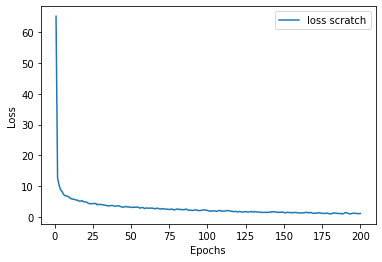

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
path='data/KITTI/loss_scratch.txt'
path_weigths='data/KITTI/loss_weigths.txt'

loss_scratch= np.loadtxt(path)
loss_weigths=np.loadtxt(path_weigths)
print(str(len(loss_scratch)))
print(str(len(loss_weigths)))

# plot  
x = list(range(1, len(loss_scratch)+1))
plt.plot(x, loss_scratch, label ='loss scratch')


plt.xlabel("Epochs")
plt.ylabel("Loss")
  
# Function add a legend  
plt.legend()
  
# function to show the plot
plt.show()

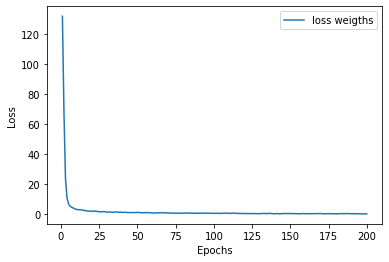

In [ ]:
plt.plot(x, loss_weigths, label ='loss weigths')
plt.xlabel("Epochs")
plt.ylabel("Loss")
  
# Function add a legend  
plt.legend()
  
# function to show the plot
plt.show()